<a href="https://colab.research.google.com/github/Fet-elena/proba/blob/main/Fetisova_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import matplotlib.pyplot as plt

import pickle
import time
import os

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
os.environ['WANDB_DISABLED'] = 'true'
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [78]:
film = pd.read_csv('wiki_movie_plots_deduped.csv')
film



,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...


In [37]:
film['Count']=1
film[['Genre','Count']].groupby(['Genre'], as_index=False).count().shape[0]
TotalCountGenres_1=sum(film['Count'])
total_counts = film.shape[0]
genre_counts = film['Genre'].value_counts()
print('total movies:',TotalCountGenres_1,'unique genre',len(film['Genre'].unique()),film['Genre'].unique())
film.describe()

total movies: 34886 unique genre 2265 ['unknown' 'western' 'comedy' ... 'adventure, romance, fantasy film' 'ero'
 'horror romantic comedy']


,Release Year,Count
count,34886.000000,34886.0
mean,1981.314252,1.0
std,27.815174,0.0
min,1901.000000,1.0
25%,1957.000000,1.0
50%,1988.000000,1.0
75%,2007.000000,1.0
max,2017.000000,1.0


***Построим гистограмму по национальным принадлежностям фильмов***

---



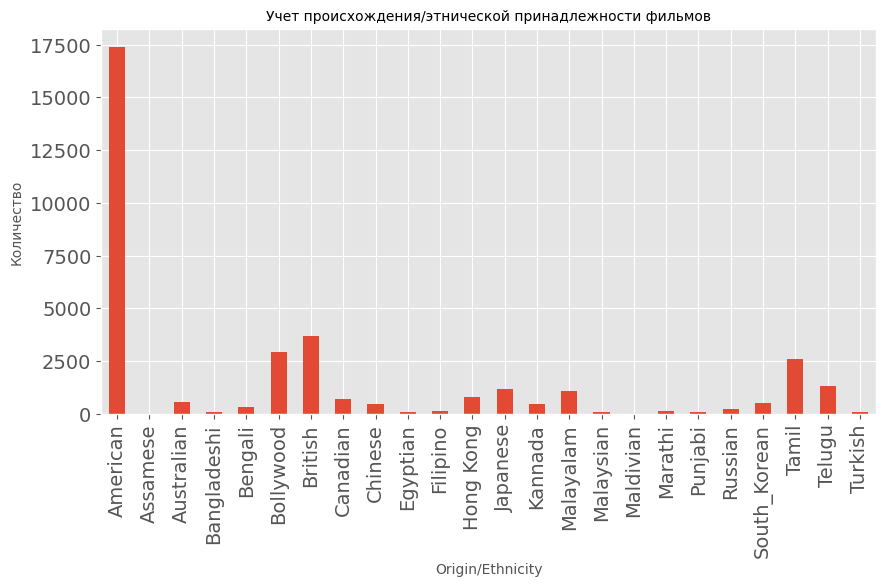

In [24]:
ax = film['Origin/Ethnicity'].value_counts().sort_index().plot.bar(
    figsize = (10, 5),
    fontsize = 14)

ax.set_title("Учет происхождения/этнической принадлежности фильмов", fontsize=10)
plt.xlabel('Origin/Ethnicity', fontsize=10)
plt.ylabel('Количество', fontsize=10)
#sns.despine(bottom=True, left=True)
plt.show()

Вывод: наибольшее количество фильмов - американские

**Построим гистограмму по количеству фильмов, выпущенных в определенный год**

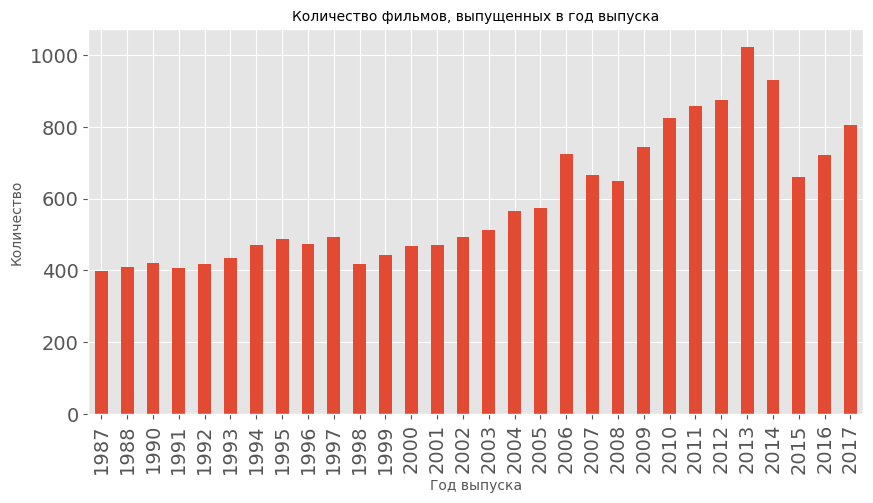

In [26]:
ax = film['Release Year'].value_counts().head(30).sort_index().plot.bar(
    figsize = (10, 5),
    fontsize = 14)

ax.set_title("Количество фильмов, выпущенных в год выпуска", fontsize=10)
plt.xlabel('Год выпуска', fontsize=10)
plt.ylabel('Количество', fontsize=10)
#sns.despine(bottom=True, left=True)
plt.show()

Вывод:

**Построим гистограмму по режиссерам фильмов**

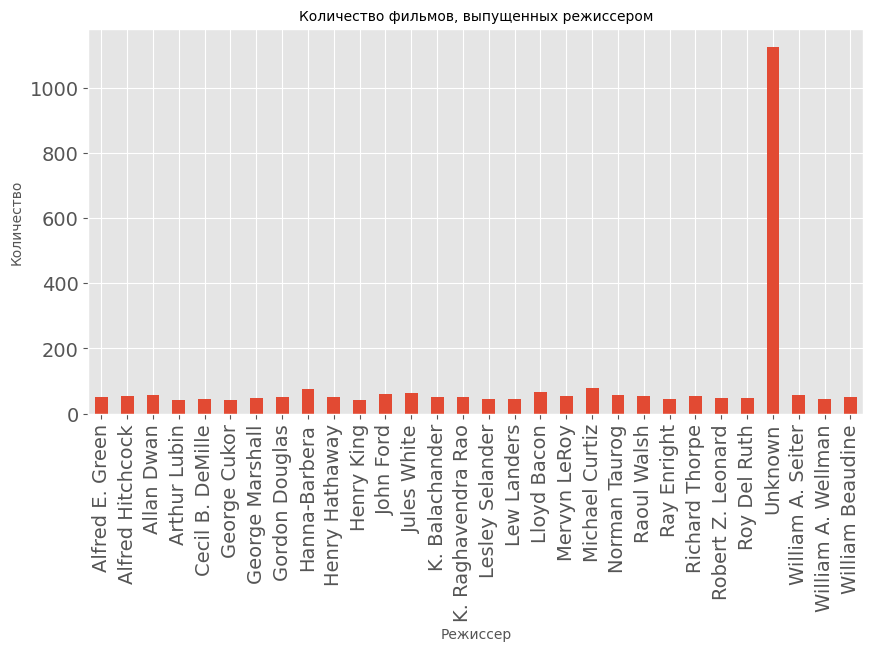

In [27]:
ax = film['Director'].value_counts().head(30).sort_index().plot.bar(
    figsize = (10, 5),
    fontsize = 14)

ax.set_title("Количество фильмов, выпущенных режиссером", fontsize=10)
plt.xlabel('Режиссер', fontsize=10)
plt.ylabel('Количество', fontsize=10)
#sns.despine(bottom=True, left=True)
plt.show()

Вывод:

**Построим гистограмму по жанрам фильмов**

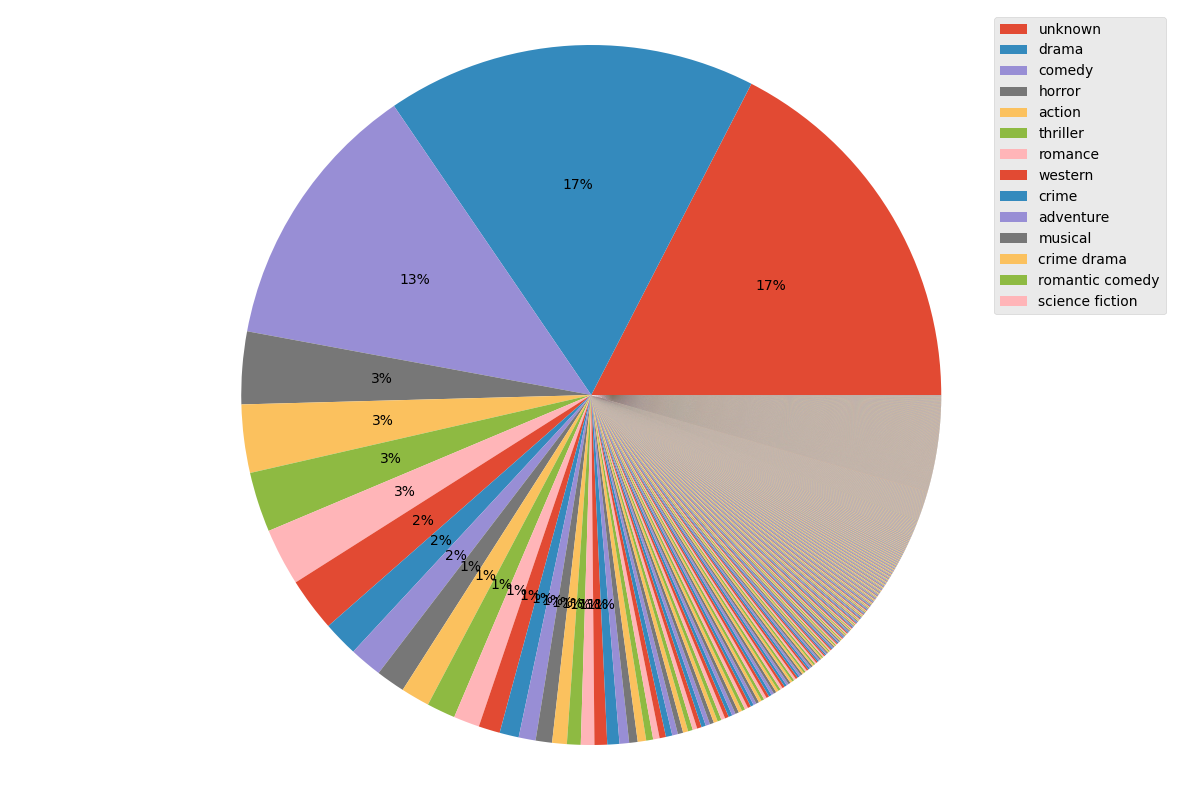

In [83]:
# построим гистограмму на имеющихся данных

sizes = pd.DataFrame(genre_counts.values/total_counts, index = genre_counts.index)

fig1, ax = plt.subplots()
def autopct_more_than_1(pct):
    return ('%1.f%%' % pct) if pct > 0.5 else ''

p,t,a = ax.pie(sizes.values.reshape(1,-1)[0], autopct=autopct_more_than_1)
ax.axis('equal')

# normalize dataframe (not actually needed here, but for general case)
normsizes = sizes/sizes.sum()*100
# create handles and labels for legend, take only those where value is > 1
h,l = zip(*[(h,lab) for h,lab,i in zip(p,sizes.index.values,normsizes.values) if i > 1])

ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))
plt.show()

Вывод: много мусора

In [74]:
# почистим жанры
# удаляем символы
sympols=set()
film['Genre']=film['Genre'].str.strip()

for i in film['Genre'] :
    for char in i :
        if not re.fullmatch(r'[a-zA-Z]', char) is not None and not char in sympols:
            sympols.add(char)
            film['Genre']=film['Genre'].str.replace(char,' ')
film['Genre']=film['Genre'].str.replace('  ',' ')
film['Genre']=film['Genre'].str.replace('   ',' ')
film['Genre']=film['Genre'].str.replace('    ',' ')
film['Genre']=film['Genre'].str.replace('    ',' ')
film['Genre']=film['Genre'].str.replace('    ',' ')

In [75]:

film["Genre"] = film["Genre"].str.replace(u"\xa0", " ", regex=False)
film["Genre"] = film["Genre"].str.strip()

# Удалим сноски
film["Genre"] = film.Genre.str.replace("\s*\[.*\]", "", regex=True)

# Корректируем далее
film["Genre"] = film["Genre"].str.replace("–|—", "-", regex=True)
film.loc[film.Genre.isin(["-", ""]), "Genre"] = "unknown"

# Завершающая пунктуация
film["Genre"] = film["Genre"].str.replace("[.,;\s]+$", "", regex=True)

# Явно не жанры
film["Genre"] = film["Genre"].str.replace(
    "(warner bros|paramount|united artists)\. ", "", regex=True
)
film["Genre"] = film["Genre"].str.replace("(co-)?produced .*$", "", regex=True)
film["Genre"] = film["Genre"].str.replace('spy spoof|spoof', "unknown")

film.loc[film.Genre.str.contains("films$"), "Genre"] = "unknown"
film["Genre"] = film["Genre"].str.replace("\s*film\s*", "", regex=True)

# на чем основан этот фильм
film["Genre"] = film["Genre"].str.replace(" (about|based on).*$", "", regex=True)

# или информация в круглых скобках
film["Genre"] = film["Genre"].str.replace(r"\s*\(.*?\)\s*", "", regex=True)

# Разные названия имеют одно и то же значение
film["Genre"] = film["Genre"].str.replace("3-d", "3d", regex=False)
film["Genre"] = film["Genre"].str.replace("science[- ]fiction", "sci-fi", regex=True)
film["Genre"] = film["Genre"].str.replace("sci fi", "sci-fi", regex=False)
film["Genre"] = film["Genre"].str.replace(r"bio-?pic", "biographical", regex=True)
film["Genre"] = film["Genre"].str.replace("biography", "biographical", regex=False)
film["Genre"] = film["Genre"].str.replace("ww|(world war)", " worldwar", regex=True)
film["Genre"] = film["Genre"].str.replace(r"(kung|gun)( |-)fu", "kungfu", regex=True)
film["Genre"] = film["Genre"].str.replace("007", "james bond", regex=False)
film["Genre"] = film["Genre"].str.replace(
    r"rom(antic|ance)? com(edy)?", "rom-com", regex=True
)
film["Genre"] = film["Genre"].str.replace(
    r"(action|comedy|horror) masala", r"\1 | masala", regex=True
)

# Опечатки
film["Genre"] = film["Genre"].str.replace("family. ", "family | ", regex=False)
film["Genre"] = film["Genre"].str.replace("familya", "family", regex=False)
film["Genre"] = film["Genre"].str.replace("supeheroes", "superheroes", regex=False)
film["Genre"] = film["Genre"].str.replace(r" in 3d.?", ", 3d", regex=True)
film["Genre"]=film["Genre"].str.replace('family','children')
film["Genre"]=film["Genre"].str.replace('martial_arts','action')
film["Genre"]=film["Genre"].str.replace('horror','thriller')
film["Genre"]=film["Genre"].str.replace('war','action')
film["Genre"]=film["Genre"].str.replace('adventure','action')
film["Genre"]=film["Genre"].str.replace('science_fiction','action')
film["Genre"]=film["Genre"].str.replace('western','action')
film["Genre"]=film["Genre"].str.replace('western','action')
film["Genre"]=film["Genre"].str.replace('noir','black')
film["Genre"]=film["Genre"].str.replace('spy','action')
film["Genre"]=film["Genre"].str.replace('superhero','action')
film["Genre"]=film["Genre"].str.replace('social','drama')
film["Genre"]=film["Genre"].str.replace('suspense','action')
film["Genre"]=film["Genre"].str.replace('musical','music')
film["Genre"]=film["Genre"].str.replace('animated','animation')
film["Genre"]=film["Genre"].str.replace('anime','animation')
film["Genre"]=film["Genre"].str.replace('rom-com','romance|comedy')
film["Genre"]=film["Genre"].str.replace('ii','unknown')
film["Genre"]=film["Genre"].str.replace('tokusatsu','unknown')
film["Genre"]=film["Genre"].str.replace("sci-fi",'ScienceFiction')
film["Genre"]=film["Genre"].str.replace('melodrama','drama')
film["Genre"]=film["Genre"].str.replace('romantic','romance')
film["Genre"]=film["Genre"].str.replace('worldaction','action')
for i in film['Genre'] :
    if 'war' in i :
        film["Genre"]=film["Genre"].str.replace(i,'action')
# Особые случаи
film.loc[film.Title == "Tales of Manhattan", "Genre"] = "drama | comedy"
film.loc[film.Title == "Aaram", "Genre"] = "romance"
film.loc[film.Title == "Roadside Attractions", "Genre"] = "comedy | drama"

# Сепараторы
film["Genre"] = film["Genre"].str.replace(' ','|')
film["Genre"] = film["Genre"].str.replace(r"\s*([;,/]| and )\s*", " | ", regex=True)
film["Genre"] = film["Genre"].str.replace(r"\s+[&-]\s+", " | ", regex=True)
film["Genre"] = film["Genre"].str.replace(r"( \| )+$", "", regex=True)

################
film['Count']=1
len(film['Genre'].unique())

def sort_unique(genre):
    if len(genre) > 1:
        return np.sort(np.unique(genre))
    else:
        return genre

film['GenreSplit'] = film['Genre'].apply(lambda x: x.strip().split('|'))
film['GenreSplit'] = film['GenreSplit'].apply(sort_unique)
genres_array = np.array([])

for i in range(0,film.shape[0]-1):
    genres_array = np.concatenate((genres_array, film['GenreSplit'][i] ))

genres_array
genres = pd.DataFrame({'Genre':genres_array})

genres['Count']=1
print(genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False).shape[0])
genres = genres[genres['Genre']!='']

601


In [80]:
genres=genres[['Genre','Count']].groupby(['Genre'], as_index=False).sum().sort_values(['Count'], ascending=False)
genres = genres[genres['Genre']!='']
TotalCountGenres=sum(genres['Count'])
genres['Frequency'] = genres['Count']/TotalCountGenres
genres['CumulativeFrequency'] = genres['Frequency'].cumsum()
genres[['Genre','Frequency','CumulativeFrequency']].groupby(['Genre'], as_index=False).sum().sort_values(['Frequency'], ascending=False).shape[0]
mainGenres=np.array(genres[genres['CumulativeFrequency']<=.95]['Genre'])
genres[['Genre','Count','Frequency','CumulativeFrequency']].head(30)

,Genre,Count,Frequency,CumulativeFrequency
165,drama,9570,0.216413,0.216413
122,comedy,7282,0.164673,0.381086
574,unknown,6257,0.141494,0.522580
3,action,5022,0.113566,0.636146
554,thriller,3287,0.074331,0.710477
453,romance,2637,0.059632,0.770109
134,crime,1605,0.036295,0.806404
339,music,964,0.021800,0.828204
0,ScienceFiction,951,0.021506,0.849709
33,animation,909,0.020556,0.870265


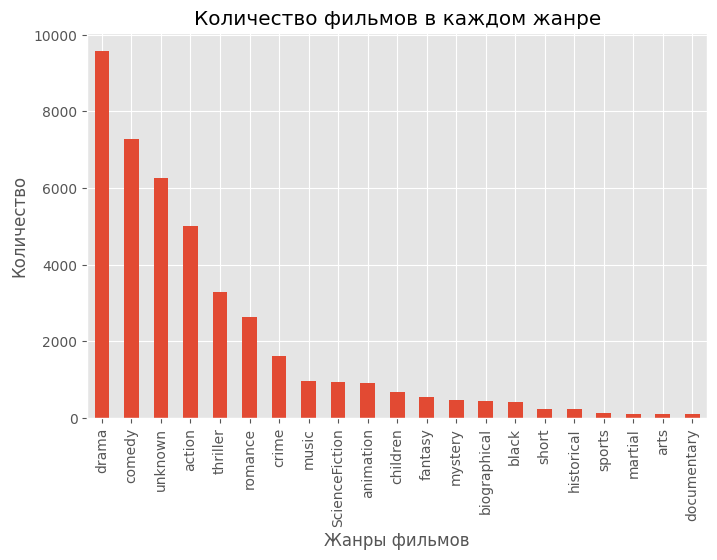

In [82]:
genres[genres['CumulativeFrequency']<=.95][['Genre','Count']].plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Количество фильмов в каждом жанре")
plt.ylabel('Количество', fontsize=12)
plt.xlabel('Жанры фильмов', fontsize=12)
plt.show()

Вывод: